In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score as cvl
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn .metrics import roc_auc_score
!pip install category_encoders
import category_encoders as ce
! pip install -U imbalanced-learn

In [59]:
from google.colab import drive
import numpy as np
import pandas as pd
drive.mount('/content/drive')
# Create the dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS 540 Data Mining/flightandweather.csv')
dfcopy = df.copy()
#dfcopy.head()
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(421768, 31)

In [60]:
df.columns
#X features need to be weather conditions
#target (y) needs to be the Weather delay binary scale

Index(['Unnamed: 0', 'FL_DATE', 'TAIL_NUM', 'ORIGIN_STATE_NM', 'DEST_STATE_NM',
       'DEP_TIME', 'DEP_DELAY_NEW', 'ARR_TIME', 'ARR_DELAY_NEW', 'CANCELLED',
       'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'count', 'try', 'time',
       'time1', 'time2', 'time3', 'timestamp', 'WindDirection', 'WindSpeed',
       'Humidity', 'visibility', 'temperature', 'presure', 'season'],
      dtype='object')

In [61]:
df = df.dropna(subset=["ARR_TIME","CANCELLED","ARR_DELAY_NEW","AIR_TIME"], axis=0)
print(df.isna().sum())
print(len(df))
df.drop(['FL_DATE','ORIGIN_STATE_NM','DEST_STATE_NM','ARR_TIME','CANCELLED','SECURITY_DELAY','NAS_DELAY','LATE_AIRCRAFT_DELAY','count','time1','time2','time3','timestamp','time','try','CARRIER_DELAY','DEP_DELAY_NEW','ARR_DELAY_NEW','TAIL_NUM','DEP_TIME'], axis = 1)

Unnamed: 0                  0
FL_DATE                     0
TAIL_NUM                    0
ORIGIN_STATE_NM             0
DEST_STATE_NM               0
DEP_TIME                    0
DEP_DELAY_NEW               0
ARR_TIME                    0
ARR_DELAY_NEW               0
CANCELLED                   0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY          351997
WEATHER_DELAY          351997
NAS_DELAY              351997
SECURITY_DELAY         351997
LATE_AIRCRAFT_DELAY    351997
count                       0
try                         0
time                        0
time1                       0
time2                      48
time3                      48
timestamp                  48
WindDirection            3380
WindSpeed                1347
Humidity                 1270
visibility               1270
temperature              1270
presure                  3768
season                      0
dtype: int64
417959


,Unnamed: 0,AIR_TIME,DISTANCE,WEATHER_DELAY,WindDirection,WindSpeed,Humidity,visibility,temperature,presure,season
0,0,84.0,563,NaN,300.0,14.0,68.0,10.0,46.0,28.00,1
1,1,85.0,563,NaN,310.0,8.0,71.0,10.0,47.0,29.00,1
2,2,88.0,563,NaN,100.0,5.0,74.0,10.0,50.0,29.00,1
3,3,88.0,563,NaN,240.0,7.0,77.0,10.0,54.0,29.00,1
4,4,89.0,563,NaN,310.0,13.0,51.0,10.0,43.0,29.00,1
...,...,...,...,...,...,...,...,...,...,...,...
421763,421763,87.0,581,NaN,280.0,9.0,73.0,10.0,40.0,28.88,4
421764,421764,93.0,760,NaN,300.0,17.0,63.0,10.0,43.0,28.94,4
421765,421765,83.0,581,NaN,270.0,16.0,36.0,10.0,56.0,28.89,4
421766,421766,101.0,760,NaN,270.0,11.0,41.0,10.0,50.0,28.89,4


In [62]:
df = df.loc[:, ['WindDirection','WindSpeed','Humidity','visibility','temperature','presure','season','WEATHER_DELAY']]
df.dropna(how='any', axis=0)

,WindDirection,WindSpeed,Humidity,visibility,temperature,presure,season,WEATHER_DELAY
6,90.0,9.0,57.0,10.00,35.0,29.00,1,0.0
10,350.0,13.0,70.0,10.00,36.0,29.00,1,0.0
14,160.0,10.0,96.0,1.00,55.0,28.00,1,0.0
17,110.0,14.0,32.0,10.00,34.0,29.00,1,0.0
18,120.0,9.0,80.0,8.00,48.0,29.00,1,0.0
...,...,...,...,...,...,...,...,...
421754,260.0,9.0,38.0,10.00,60.0,28.78,4,0.0
421755,280.0,13.0,47.0,9.94,52.0,28.82,4,0.0
421758,270.0,10.0,38.0,10.00,55.0,28.81,4,0.0
421759,270.0,15.0,50.0,10.00,58.0,28.82,4,0.0


In [63]:
len(df)

417959

In [64]:
X = df.loc[:, ['WindDirection','WindSpeed','Humidity','visibility','temperature','presure','season']]
y = df.loc[:, 'WEATHER_DELAY']

In [65]:
y

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
421763   NaN
421764   NaN
421765   NaN
421766   NaN
421767   NaN
Name: WEATHER_DELAY, Length: 417959, dtype: float64

In [66]:
print(X.isnull().sum())
print(y.isnull().sum())

WindDirection    3380
WindSpeed        1347
Humidity         1270
visibility       1270
temperature      1270
presure          3768
season              0
dtype: int64
351997


In [67]:
missing_values = X.isnull().sum()
for i in missing_values:
  if i >= 0.0:
    X.interpolate(method = 'linear', inplace = True)
X = X.values
print(X)

[[300.    14.    68.   ...  46.    28.     1.  ]
 [310.     8.    71.   ...  47.    29.     1.  ]
 [100.     5.    74.   ...  50.    29.     1.  ]
 ...
 [270.    16.    36.   ...  56.    28.89   4.  ]
 [270.    11.    41.   ...  50.    28.89   4.  ]
 [300.    17.    63.   ...  43.    28.94   4.  ]]


In [68]:
print(len(X))
print(len(y))
type(y)
type(X)

417959
417959


numpy.ndarray

In [69]:
Y = []
for i in y:
  if math.isnan(i):
    Y.append(0)
  else:
    if i >= 15.0:
      Y.append(1)
    if i < 15.00:
      Y.append(0)
y = Y

In [70]:
y = pd.DataFrame(data=y,columns=['Weather Delay'])

print(len(y))
print(y['Weather Delay'].value_counts(1))
print(y['Weather Delay'].value_counts(0))

417959
Weather Delay
0    0.993475
1    0.006525
Name: proportion, dtype: float64
Weather Delay
0    415232
1      2727
Name: count, dtype: int64


In [71]:
def unique(list1):
  list_set = set(y)
  unique_list = list(list_set)
  for x in unique_list:
      print(x, end=" ")
unique(y)

Weather Delay 

Weather Delay
0                415232
1                  2727
Name: count, dtype: int64


<Axes: ylabel='count'>

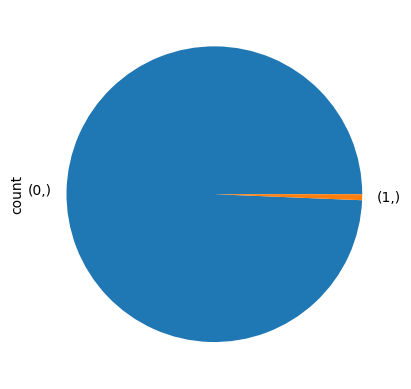

In [72]:
print(y.value_counts())
y.value_counts().plot.pie()

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1, random_state = 47)
X_res, y_res = rus.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

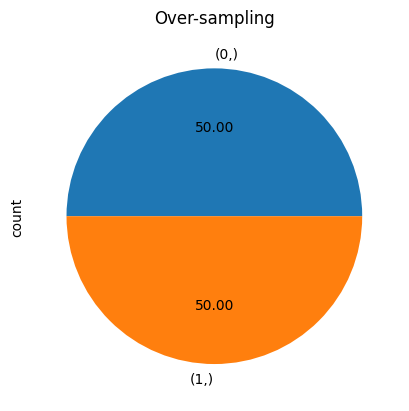

In [73]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 1, random_state = 47)
X_res, y_res = ros.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [74]:
print(len(X_res))
print(len(y_res))

830464
830464


In [75]:
#X = pd.DataFrame(data=X,columns = ['WindDirection','WindSpeed','Humidity','visibility','temperature','presure','season'])
#y = pd.DataFrame(data=y,columns=['Weather Delay'])

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

In [77]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y['Weather Delay']), y=y['Weather Delay'])
print(class_weights)


[ 0.50328371 76.63348001]


from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Resample the training data using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Convert the y_resampled DataFrame into a Series
y_resampled = y_resampled.squeeze()

# Compute class weights
classes = y_resampled.unique()
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_resampled)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

# Initialize and train the model with class weights
model = LogisticRegression(class_weight=class_weight_dict)
model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


In [78]:
X = X_res
y = y_res
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .30,random_state = 47)

In [79]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(type(X))
print(type(y))

581324
581324
249140
249140
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [80]:
#X = np.array(X)
#y = np.array(y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)

#Define Classifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [81]:
print('Confusion Matrix: KNN')
print(cm)
precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

Confusion Matrix: KNN
[[104149  20115]
 [  6134 118742]]
precision: [0.94437946 0.85513874]
recall: [0.83812689 0.95087927]
fscore: [0.8880864  0.90047131]
support: [124264 124876]


In [82]:
auc = np.round(roc_auc_score(y_test, y_pred), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.895


In [83]:
#X = pd.DataFrame(data=X,columns = ['AIR_TIME','DISTANCE','WindDirection','WindSpeed','Humidity','visibility','temperature','presure','season'])

In [84]:
#Linear Regression R2 Score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
r2=r2_score
r1 = r2(y_train, y_pred_train)
print('R2 Score is:',r1)

R2 Score is: 0.17054834365849958


In [85]:
auc = np.round(roc_auc_score(y_train, y_pred_train), 3)
print("Auc for our data is {}".format(auc))

Auc for our data is 0.745


In [86]:
X = pd.DataFrame(data=X,columns = ['WindDirection','WindSpeed','Humidity','visibility','temperature','presure','season'])
y = pd.DataFrame(data=y,columns=['Weather Delay'])

In [ ]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 30,
                                        criterion ='entropy', max_features = 8, random_state = 47, oob_score = True, bootstrap = True)
clf = extra_tree_forest.fit(X_train, y_train)
model = extra_tree_forest
model.fit(X_train, y_train)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)
print(cvl(clf, X_train, y_train, cv=8))
plt.figure(figsize=(50,22))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels', fontsize = 30)
plt.ylabel('Feature Importances', fontsize = 30)
plt.title('Comparison of different Feature Importances', fontsize = 30)
plt.show()

extra_tree_forest = ExtraTreesClassifier(n_estimators = 30,
                                        criterion ='entropy', max_features = 8, random_state = 47, oob_score = True, bootstrap = True)
clf = extra_tree_forest.fit(X_test, y_test)
model = extra_tree_forest
model.fit(X_test, y_test)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)
print(cvl(clf, X_test, y_test, cv=8))
plt.figure(figsize=(50,22))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels', fontsize = 30)
plt.ylabel('Feature Importances', fontsize = 30)
plt.title('Comparison of different Feature Importances', fontsize = 30)
plt.show()

<ipython-input-87-4fad576a6df2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = extra_tree_forest.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-87-4fad576a6df2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-

In [ ]:
cvl(clf, X_train, y_train, cv=8)
clf = tree.DecisionTreeClassifier(max_depth=3, random_state = 47)
clf = clf.fit(X,y)
xpred = clf.predict(X)
xpred
predicted = xpred
y_test = y
precision, recall, fscore, support = score(y_test, predicted)

In [ ]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

In [ ]:
#Ada Boost

# Define a weak classifier (Decision Tree with max depth 1)
weak_classifier = DecisionTreeClassifier(max_depth=1)
# Create an AdaBoostClassifier with 10 estimators
adaboost_model = AdaBoostClassifier(base_estimator=weak_classifier, n_estimators=3)
adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
accuracy


In [ ]:
#Kappa Statistic
encoder = ce.OrdinalEncoder(cols=['WindDirection','WindSpeed','Humidity','visibility','temperature','presure','season'])
X = encoder.fit_transform(X)
r1 = X['WindDirection']
r2 = X['WindSpeed']
r3 = X['Humidity']
r4 = X['visibility']
r5 = X['temperature']
r6 = X['presure']
r7 = X['season']


print(cohen_kappa_score(r1, y))
print(cohen_kappa_score(r2, y))
print(cohen_kappa_score(r3, y))
print(cohen_kappa_score(r4, y))
print(cohen_kappa_score(r5, y))
print(cohen_kappa_score(r6, y))
print(cohen_kappa_score(r7, y))